This notebook explores NN development on [fashion MNIST data](https://github.com/zalandoresearch/fashion-mnist)

In [165]:
#Only imports necessary blocks
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch import nn
from torch import optim

import shutil #Folder deletion

import numpy as np

import matplotlib.pyplot as plt

### Data pulls

In [142]:
#Download data
train_ds = FashionMNIST('/Users/archi/Desktop/Learning/fastai-archi',train = True,download=True)
#train_dl = DataLoader(train_ds,batch_size=4,shuffle=True,num_workers=4)

test_ds = FashionMNIST('/Users/archi/Desktop/Learning/fastai-archi',train = False,download=False)
#test_dl = DataLoader(test_ds,batch_size=4,shuffle=True,num_workers=4)






0it [00:00, ?it/s]






  0%|          | 0/26421880 [00:00<?, ?it/s]




  0%|          | 16384/26421880 [00:00<04:19, 101884.82it/s]




  0%|          | 49152/26421880 [00:00<03:39, 119879.64it/s]




  0%|          | 98304/26421880 [00:00<02:53, 151971.64it/s]




  1%|          | 212992/26421880 [00:00<02:11, 199056.93it/s]




  2%|▏         | 442368/26421880 [00:01<01:36, 268386.44it/s]




  3%|▎         | 704512/26421880 [00:01<01:11, 358279.08it/s]




  5%|▌         | 1425408/26421880 [00:01<00:50, 494684.86it/s]




 11%|█         | 2850816/26421880 [00:01<00:34, 691667.66it/s]




 19%|█▊        | 4939776/26421880 [00:01<00:22, 966202.33it/s]




 21%|██▏       | 5636096/26421880 [00:01<00:16, 1228938.34it/s]




 24%|██▎       | 6225920/26421880 [00:02<00:13, 1543163.91it/s]




 26%|██▌       | 6823936/26421880 [00:02<00:10, 1895180.40it/s]




 28%|██▊       | 7315456/26421880 [00:02<00:08, 2123613.77it/s]




 29%|██▉       | 7749632/26421880 [00:02<00:08, 2190245.63it/s]




 31%|███    

Extracting /Users/archi/Desktop/Learning/fastai-archi/FashionMNIST/raw/train-images-idx3-ubyte.gz to /Users/archi/Desktop/Learning/fastai-archi/FashionMNIST/raw








0it [00:00, ?it/s]







  0%|          | 0/29515 [00:00<?, ?it/s]





32768it [00:00, 66146.38it/s]                            






0it [00:00, ?it/s]

Extracting /Users/archi/Desktop/Learning/fastai-archi/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /Users/archi/Desktop/Learning/fastai-archi/FashionMNIST/raw








  0%|          | 0/4422102 [00:00<?, ?it/s]





  0%|          | 16384/4422102 [00:00<00:43, 101279.98it/s]





  1%|          | 49152/4422102 [00:00<00:36, 119034.40it/s]





  2%|▏         | 98304/4422102 [00:00<00:28, 149982.77it/s]





  5%|▍         | 212992/4422102 [00:00<00:21, 196583.94it/s]





 10%|█         | 442368/4422102 [00:01<00:15, 265060.45it/s]





 16%|█▌        | 704512/4422102 [00:01<00:10, 353659.65it/s]





 32%|███▏      | 1425408/4422102 [00:01<00:06, 488594.50it/s]





 65%|██████▍   | 2867200/4422102 [00:01<00:02, 681896.99it/s]






0it [00:00, ?it/s]

Extracting /Users/archi/Desktop/Learning/fastai-archi/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /Users/archi/Desktop/Learning/fastai-archi/FashionMNIST/raw









8192it [00:00, 23063.14it/s]            

Extracting /Users/archi/Desktop/Learning/fastai-archi/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/archi/Desktop/Learning/fastai-archi/FashionMNIST/raw
Processing...
Done!


In [143]:
#Delete the downloaded folder
dir_path = '/Users/archi/Desktop/Learning/fastai-archi/FashionMNIST'
shutil.rmtree(dir_path)

In [144]:
print("Shape of training data:", train_ds.data.shape)
print("Shape of test data:", test_ds.data.shape)

Shape of training data: torch.Size([60000, 28, 28])
Shape of test data: torch.Size([10000, 28, 28])


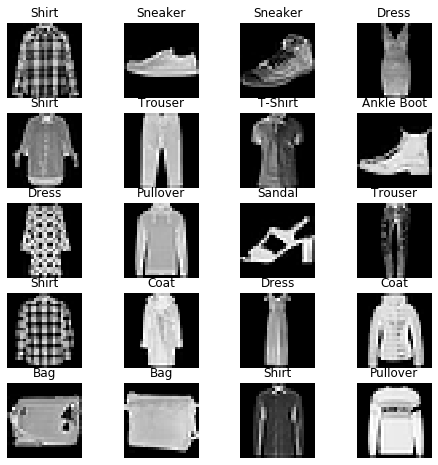

In [145]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

fig = plt.figure(figsize=(8,8))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_ds.data));
    img = train_ds.data[img_xy]
    fig.add_subplot(rows, columns, i)
    plt.title(labels_map[train_ds[img_xy][1]])
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [146]:
#Also
#Image
train_ds[2][0]

In [147]:
#Label
train_ds[2][1]

0

### Model

In [349]:
x_train = train_ds.data.view(60000,28*28).float()/255.
x_test = test_ds.data.view(10000,28*28).float()/255.

In [350]:
y_train = train_ds.targets #Training data needs to be in float but not targets
y_test = test_ds.targets

In [351]:
print("Shape of training data:", x_train.data.shape)
print("Shape of test data:", x_test.data.shape)

print("Shape of training targer:", y_train.data.shape)
print("Shape of test target:", y_test.data.shape)

Shape of training data: torch.Size([60000, 784])
Shape of test data: torch.Size([10000, 784])
Shape of training targer: torch.Size([60000])
Shape of test target: torch.Size([10000])


In [352]:
#Shape of data
n,m = x_train.shape
c = len(train_ds.classes)
nh_1 = 128 #Hidden layers

In [353]:
#Model parameters
bs=64   # batch size
lr = 0.2   # learning rate
epochs = 1 # how many epochs to train for
loss_func = F.cross_entropy

In [354]:
#Required functions
def accuracy(out, yb): return (torch.argmax(out, dim=1)==yb).float().mean()

In [355]:
class Dataset():
    def __init__(self, x, y): self.x,self.y = x,y
    def __len__(self): return len(self.x)
    def __getitem__(self, i): return self.x[i],self.y[i]

In [356]:
train_ds_m, test_ds_m = Dataset(x_train, y_train),Dataset(x_test, y_test)

In [357]:
def get_dls(train_ds, valid_ds, bs, **kwargs):
    return (DataLoader(train_ds, batch_size=bs, shuffle=True, **kwargs),
            DataLoader(valid_ds, batch_size=bs, **kwargs))

In [365]:
def get_model():
    model = nn.Sequential(nn.Linear(m,nh_1), nn.ReLU(), nn.Linear(nh_1,c))
    return model, optim.SGD(model.parameters(), lr=lr)

In [369]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        # Handle batchnorm / dropout
        model.train()
#         print(model.training)
        for xb,yb in train_dl:
            loss = loss_func(model(xb), yb)
            loss.backward()
            opt.step()
            opt.zero_grad()

        model.eval()
#         print(model.training)
        with torch.no_grad():
            tot_loss,tot_acc = 0.,0.
            for xb,yb in valid_dl:
                pred = model(xb)
                tot_loss += loss_func(pred, yb)
                tot_acc  += accuracy(pred,yb)
        nv = len(valid_dl) #Counting number of mini-batches
        print(epoch, tot_loss/nv, tot_acc/nv)
    return tot_loss/nv, tot_acc/nv #This division basically normalizes since accuracy cannot be more than 1 :D

In [370]:
#Print stats for weights
def stats(x): return x.mean(),x.std()
model,opt = get_model()
for param in model.parameters():
    print(stats(param.data))

(tensor(3.1764e-05), tensor(0.0206))
(tensor(0.0020), tensor(0.0207))
(tensor(0.0010), tensor(0.0463))
(tensor(0.0098), tensor(0.0421))


Weight initialization covered in [doc](https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py)

[Latex reader](https://www.codecogs.com/latex/eqneditor.php) to convert the ugly comment in the link above

In [372]:
train_dl, test_dl = get_dls(train_ds_m, test_ds_m, bs)
model,opt = get_model()
loss,acc = fit(8, model, loss_func, opt, train_dl, test_dl)

0 tensor(0.4781) tensor(0.8332)
1 tensor(0.4584) tensor(0.8242)
2 tensor(0.3939) tensor(0.8553)
3 tensor(0.4587) tensor(0.8433)
4 tensor(0.4776) tensor(0.8202)
5 tensor(0.4384) tensor(0.8389)
6 tensor(0.3778) tensor(0.8603)
7 tensor(0.3713) tensor(0.8651)


In [373]:
#86% accuracy on test data is not bad for first attempt

### Model debugging

In [291]:
print("Accuracy of model:",acc)

Accuracy of model: tensor(0.0998)


In [292]:
#Model architecture
model

Sequential(
  (0): Linear(in_features=784, out_features=150, bias=True)
  (1): ReLU()
  (2): Linear(in_features=150, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
)

In [293]:
#Print shape of weights matrix
for param in model.parameters():
    print(param.data.shape)

torch.Size([150, 784])
torch.Size([150])
torch.Size([50, 150])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])


In [294]:
#Print shape of weights-gradient matrix
for param in model.parameters():
    print(param.grad.shape)

torch.Size([150, 784])
torch.Size([150])
torch.Size([50, 150])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])


In [295]:
#Print stats for weights
def stats(x): return x.mean(),x.std()

for param in model.parameters():
    print(stats(param.data))

(tensor(-16672.6855), tensor(139138.5312))
(tensor(-205.2846), tensor(1413.1521))
(tensor(-4105229.), tensor(2.6451e+08))
(tensor(-844.0945), tensor(1995.7842))
(tensor(-0.0068), tensor(334406.7188))
(tensor(0.0009), tensor(0.0468))


In [364]:
#Validation of accuracy function
for xb,yb in test_dl:
    model.eval()
    pred = torch.argmax(model(xb), dim=1)
    #pred = model(xb)
    break
print("Actual labels", yb)
print("Predicted labels", pred)
print("Training data", (xb).max()) #Need to normalize the data

Actual labels tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5])
Predicted labels tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5,
        1, 2, 4, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 9, 6, 7, 2, 1,
        4, 6, 4, 2, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5])
Training data tensor(1.)


In [348]:
train_ds.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}